<h1 style="font-size:20px;"><strong>
Activity 2: UK Accident Datasets </strong></h1>

<p>Analyst: Imari Calado</p>


    


In [33]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
accident = pd.read_csv('accident_data.csv')

In [35]:
accident.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [36]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1 style="font-size:20px;"><strong>
Data Cleansing


    


In [37]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Latitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Accident Date'] = accident['Accident Date'].fillna(0)
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])


In [38]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1 style="font-size:20px;"><strong>
Categorical Data Fields </h1>

In [39]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [40]:
accident['Index'] = accident ['Index'].astype('category')
accident['Light_Conditions'] = accident ['Light_Conditions'].astype('category')
accident['District Area'] = accident ['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident ['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident ['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident ['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident ['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident ['Vehicle_Type'].astype('category')


In [41]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  object  
 2   Accident Date            660679 non-null  object  
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

In [42]:
accident['Accident Date'] = accident ['Accident Date'].str.strip()

accident['Accident Date'] = accident ['Accident Date'].astype('str')

accident['Accident Date'] = accident ['Accident Date'].str.replace('/','-')

accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True,  errors='coerce')


<h1 style="font-size:20px;"><strong>
Adjusting Data Types </h1>

In [43]:
accident.dtypes

Index                            category
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1 style="font-size:20px;"><strong>
Extracting date information using pandas date time </h1>

In [44]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek  # 0=Monday, 6=Sunday

In [45]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1 style="font-size:20px;"><strong>
UK Accident Questions </h1>

 <h1 style="font-size:20px;"><strong> Q1.Total accidents are recorded in the dataset?
</h1>

In [46]:
len(accident)   


660679

 <h1 style="font-size:15px;"><strong> Insight 1: There are 660,679 accident records. 
</h1>

In [47]:
accident["Accident Date"].nunique()  

1461

 <h1 style="font-size:15px;"><strong> Insight 2: These accidents are spread across X unique dates. 
</h1>

 <h1 style="font-size:20px;"><strong> Q2. Most common accident severity
</h1>

In [48]:
accident["Accident_Severity"].value_counts()


Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h1 style="font-size:15px;"><strong> Insight 3: Slight accidents are the most common type.</h1>
<h2 style="font-size:15px;"><strong> Insight 4: Fatal accidents are the least common type.</h2>

In [49]:
accident["Accident_Severity"].value_counts(normalize=True) * 100

Accident_Severity
Slight     85.336601
Serious    13.352475
Fatal       1.310924
Name: proportion, dtype: float64

<h1 style="font-size:15px;"><strong> Insight 5: Fatal accidents represent only a small percentage of total cases.
</h1>

In [50]:
accident.groupby("Accident_Severity")["Number_of_Casualties"].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

 <h1 style="font-size:15px;"><strong>Insight 6: The average number of casualties is highest in fatal accidents.

 <h1 style="font-size:20px;"><strong> Q3. Accidents by light conditions
</h1>

In [51]:
accident["Light_Conditions"].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

 <h1 style="font-size:15px;"><strong>Insight 7: Most accidents happen in daylight.

In [52]:
accident.groupby("Light_Conditions")["Accident_Severity"].value_counts().head(10)

Light_Conditions             Accident_Severity
Darkness - lighting unknown  Slight                 5622
                             Serious                 794
                             Fatal                    68
Darkness - lights lit        Slight               108345
                             Serious               19130
                             Fatal                  1860
Darkness - lights unlit      Slight                 2138
                             Serious                 360
                             Fatal                    45
Darkness - no lighting       Slight                28651
Name: count, dtype: int64

<h1 style="font-size:15px;"><strong>Insight 8: Accidents in darkness without lighting are more severe compared to daylight. </h1></strong>
<h2 style="font-size:15px;"><strong>Insight 9: Most nighttime accidents still happen where streetlights are lit. </h2>

 <h1 style="font-size:20px;"><strong> Q4. Number of vehicles per accident
</h1>

In [53]:
accident["Number_of_Vehicles"].value_counts().sort_index()



Number_of_Vehicles
1     200787
2     391995
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
12         7
13         6
14         9
15         1
16         4
19         1
28         1
32         1
Name: count, dtype: int64

<h1 style="font-size:15px;"><strong>Insight 10: Most accidents involve in 2 vehicles.

In [54]:
accident.groupby("Number_of_Vehicles")["Number_of_Casualties"].mean()


Number_of_Vehicles
1      1.170932
2      1.374880
3      1.711169
4      1.995575
5      2.315341
6      2.612137
7      3.064189
8      3.401361
9      3.350877
10     3.629630
11     4.000000
12     2.285714
13     7.833333
14     5.444444
15     5.000000
16     6.000000
19    13.000000
28    16.000000
32     5.000000
Name: Number_of_Casualties, dtype: float64

<h1 style="font-size:15px;"><strong>Insight 11: Single vehicle accidents are fewer but often more severe.

 <h1 style="font-size:20px;"><strong> Q5. District with most accidents
</h1>

In [55]:
accident["District Area"].value_counts().head(10)


District Area
Birmingham          13491
Leeds                8898
Manchester           6720
Bradford             6212
Sheffield            5710
Westminster          5706
Liverpool            5587
Glasgow City         4942
Bristol, City of     4819
Kirklees             4690
Name: count, dtype: int64

<h1 style="font-size:15px;"><strong>Insight 12: Birmingham have more accidents

<h1 style="font-size:20px;"><strong> Q6. Casualties by district density
</h1>

In [56]:
accident.groupby("District Area")["Number_of_Casualties"].mean().sort_values(ascending=False).head(10)


District Area
Blaeu Gwent          1.693694
West Somerset        1.613990
Derwentside          1.606186
Chester-le-Street    1.603306
Durham               1.580431
Blaenau Gwent        1.579310
Fylde                1.569350
Hambleton            1.568523
Merthyr Tydfil       1.568182
West Lancashire      1.566341
Name: Number_of_Casualties, dtype: float64

<h1 style="font-size:15px;"><strong>Insight 13:Blaeu Gwent has the highest average with most crashes 

<h1 style="font-size:20px;"><strong> Q7. Correlation between number of vehicles and casualties
</h1>

In [57]:
accident[["Number_of_Vehicles","Number_of_Casualties"]].corr()


,Number_of_Vehicles,Number_of_Casualties
Number_of_Vehicles,1.000000,0.228889
Number_of_Casualties,0.228889,1.000000


<h1 style="font-size:15px;"><strong>Insight 14: There is a positive correlation

In [58]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'])
accident['Day_of_Week'] = accident['Accident Date'].dt.day_name()
accident['Day_of_Week'].value_counts()


Day_of_Week
Saturday     107178
Wednesday     99558
Thursday      99511
Friday        97900
Tuesday       94550
Sunday        89302
Monday        72680
Name: count, dtype: int64

<h1 style="font-size:15px;"><strong>Insight 15: Saturday has the most accidents. </strong></h1>
<h1 style="font-size:15px;"><strong>Insight 16: Monday has the least number of accidents compared to other days of the week.

<h1 style="font-size:20px;"><strong> Q8. Has more accidents (Urban and Rural)


In [59]:
accident['Urban_or_Rural_Area'].value_counts()


Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h1 style="font-size:15px;"><strong>Insight 17: Urban areas usually have more accidents.

<h1 style="font-size:20px;"><strong>
VISUALIZATION 

<h1 style="font-size:20px;"><strong> Q9. Road surface conditions that are linked with accidents


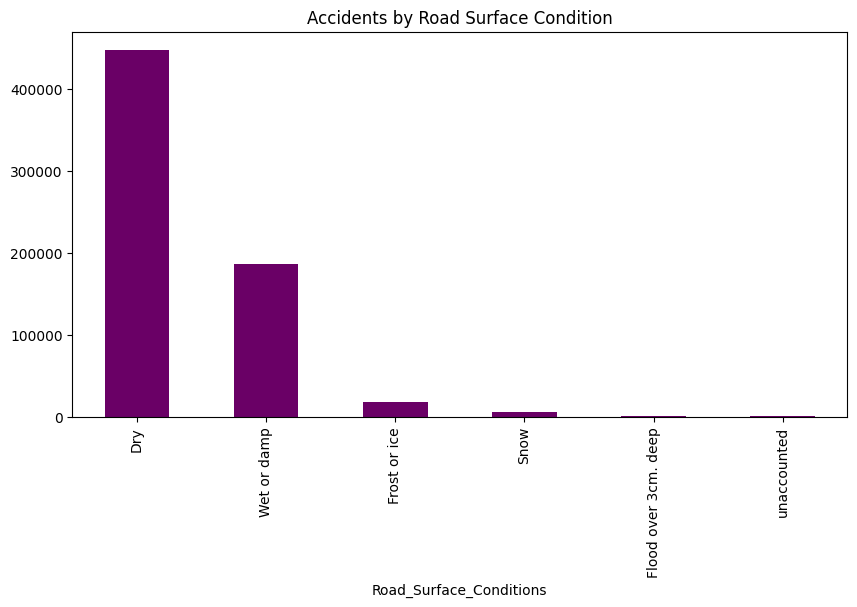

In [60]:
surface_counts = accident["Road_Surface_Conditions"].value_counts()
surface_counts.plot(color ='#6A0066', kind="bar",figsize=(10,5), title="Accidents by Road Surface Condition")
plt.show()

<h1 style="font-size:15px;"><strong>Insight 18: Most accidents occur on dry roads.</strong></h1>
<h2 style="font-size:15px;"><strong> Insight 19: Accident numbers significantly increase on wet or damp roads.</strong></h2>
<h2 style="font-size:15px;"><strong> Insight 20: Few accidents happens on frost or ice roads and snow roads.



<h1 style="font-size:20px;"><strong> Q9. Monthly distribution of accident occurrences


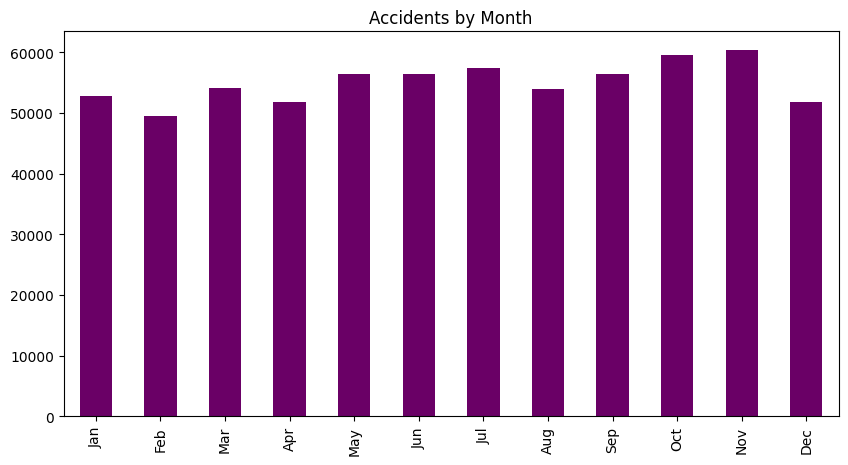

In [61]:
monthly_accidents = accident["Accident Date"].dt.month.value_counts().sort_index()
monthly_accidents.index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
monthly_accidents.plot(color='#6A0066', kind="bar", figsize=(10,5), title="Accidents by Month")
plt.show()

<h1 style="font-size:15px;"><strong>Insight 21: The 2nd month (February) shows the lowest bar, meaning fewer accidents occur in February compared to other months </strong></h1>
<h2 style="font-size:15px;"><strong> Insight 22: From May to June, the accident counts remain fairly steady without sharp peaks. This suggests that summer months have more stable accident trends</strong></h2>
    
<h3 style="font-size:15px;"><strong>Insight 23: October and November record the highest accident counts

<h1 style="font-size:20px;"><strong> Q10. Average Cassualties per Accidents 


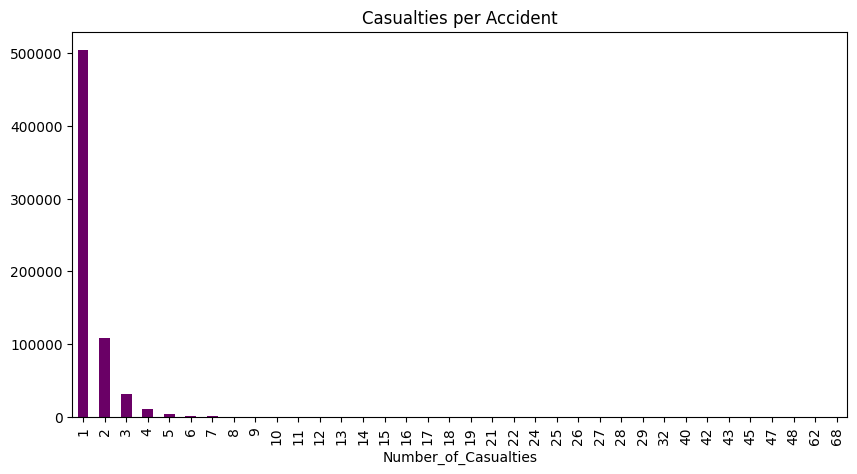

In [62]:
casualty_distribution = accident["Number_of_Casualties"].value_counts().sort_index()
casualty_distribution.plot(color='#6A0066', kind="bar", figsize=(10,5), title="Casualties per Accident")
plt.show()

<h1 style="font-size:15px;"><strong>Insight 24: it's indicates that most accidents result in one casualty</strong></h1>
<h2 style="font-size:15px;"><strong> Insight 25: When you look at accidents with 2 or more casualties, the numbers drop fast, so those cases don’t happen as often.

<h1 style="font-size:20px;"><strong> ExploringData: National Trends to Local Insights

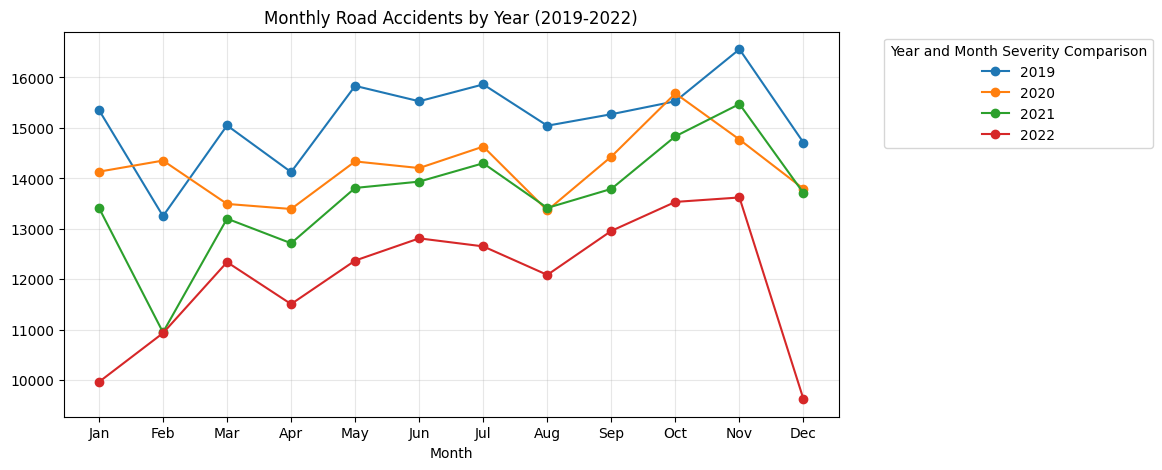

In [63]:
import matplotlib.pyplot as plt

monthly_data = accident.groupby(['Year', 'Month']).size()

monthly_data = monthly_data.unstack(level=0)

monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h1 style="font-size:15px;"><strong>Insight 26: year 2019 had the highest accident counts and almost every month in 2019 recorded higher accidents compared to other years </strong></h1>

<h1 style="font-size:15px;"><strong>Insight 27: year 2022 had the lowest accident counts, The red line indicating the accident counts in year 2022 consistently stayed below the other years

 <h1 style="font-size:20px;"><strong> GEOSPATIAL ANALYSIS
</h1>

In [5]:
import folium
from folium.plugins import HeatMap
import pandas as pd

file_path = "accident_data.csv"   
accident = pd.read_csv(file_path)

accident = accident.dropna(subset=["Latitude", "Longitude"])


In [6]:
westminster = accident[accident['District Area']== 'Westminster']

In [7]:
westminster.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [8]:
westminster_fatal = westminster[westminster['Accident_Severity'] == 'Serious']

In [11]:
import folium
from folium.plugins import HeatMap

locations  = list(zip(westminster_fatal['Latitude'],westminster_fatal['Longitude']))

m = folium.Map(location=[westminster_fatal['Latitude'].mean(), westminster_fatal['Longitude'].mean()], zoom_start=10)


title_html = """
     <h3 align="center" style="font-size:20px; background-color: #6A0066; color: white; padding: 10px;">
         Fatal Accident Heatmap in Westminster
     </h3>
     """

m.get_root().html.add_child(folium.Element(title_html))


HeatMap(locations).add_to(m)


m.save('accident_heatmap.html') 
m  

<h1 style="font-size:15px;"><strong>Insight 28: The heatmap shows a concentrted region of fatal accidents around Westminster, likely indicating high-risk areas. The intensity of the red color suggests that this area has the highest frequency of accidents. </strong></h1>

<h2 style="font-size:15px;"><strong> Insight 29: The heatmap highlights the geographical distribution of fatal accidents, which can be useful for local authorities to identify hotspots.</h2>

In [14]:
import folium
from folium.plugins import HeatMap


district_name = "Camden"

camden = accident[accident["District Area"] == district_name]

camden = camden.dropna(subset=["Latitude", "Longitude"])

m = folium.Map(
    location=[camden["Latitude"].mean(), camden["Longitude"].mean()],
    zoom_start=14
)

heat_data = list(zip(camden["Latitude"], camden["Longitude"], camden["Number_of_Casualties"]))
HeatMap(heat_data, max_zoom=13, radius=8, blur=6).add_to(m)

title_html = """
     <h3 align="center" style="font-size:20px; background-color: #6A0066; color: white; padding: 10px;">
         Casualty Heatmap for Camden
     </h3>
     """

m.get_root().html.add_child(folium.Element(title_html))

m.save("camden_casualty_heatmap.html")
m


<h1 style="font-size:15px;"><strong> Insight 30: High Casualty Density Around Major Roads </strong></h1>
<p1>There is a clear concentration of casualties along major roads and intersections in Camden, indicating these areas as high-risk zones for traffic-related incidents</p1>

<h1 style="font-size:15px;"><strong> Insight 31: Low Incident Ares</strong></h1>

<p1>Outer parts of Camden such as Belsize Park, South Hampstead, and Primrose Hill appear in blue, reflecting low casualty density and lower risk.</p1>